In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

plt.rcParams.update({'font.size': 16, 'axes.grid': True})

SR = 22050 # sampling rate of the audio

wide = (18, 3)
big = (18, 8)

filename = librosa.example('nutcracker')
src, sr = librosa.load(filename, sr=SR, mono=True, duration=5.0)
print(f'{src.shape=}, {sr=}')

src.shape=(110250,), sr=22050


# Waveforms

(-1.0, 1.0)

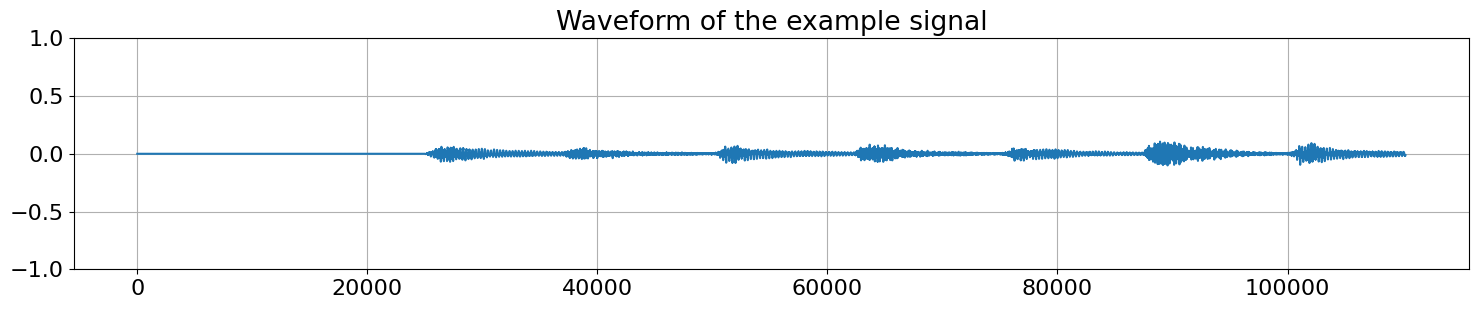

In [7]:
plt.figure(figsize=wide)
plt.title('Waveform of the example signal')
plt.plot(src);plt.ylim([-1, 1])

In [8]:
ipd.Audio(src, rate=sr) # Load a numpy array as an audio stream

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

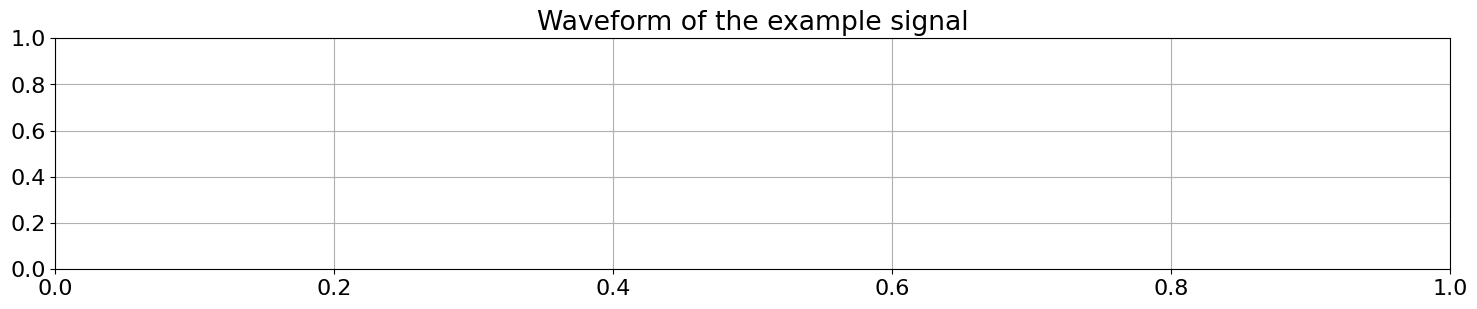

In [15]:
# Plot using librosa
plt.figure(figsize=wide)
plt.title("Waveform of the example signal")
librosa.display.waveshow(src, sr=22050)

# Log-magnitude STFT

In [16]:
eps = 0.001
n_fft = 512 # STFT param. Higher means higher freq resolution
hop_length = n_fft // 4 # STFT param. Smaller means higher time resolution
stft_complex = librosa.stft(src, n_fft=n_fft, hop_length=hop_length)
print(f"{src.shape=}\n{stft_complex.dtype=}\n{stft_complex.shape=}\n{stft_complex[3,3]=}\n")

src.shape=(110250,)
stft_complex.dtype=dtype('complex64')
stft_complex.shape=(257, 862)
stft_complex[3,3]=(-4.4196606e-09+2.0660792e-08j)



In [17]:
log_stft = np.log(np.abs(stft_complex) + eps)

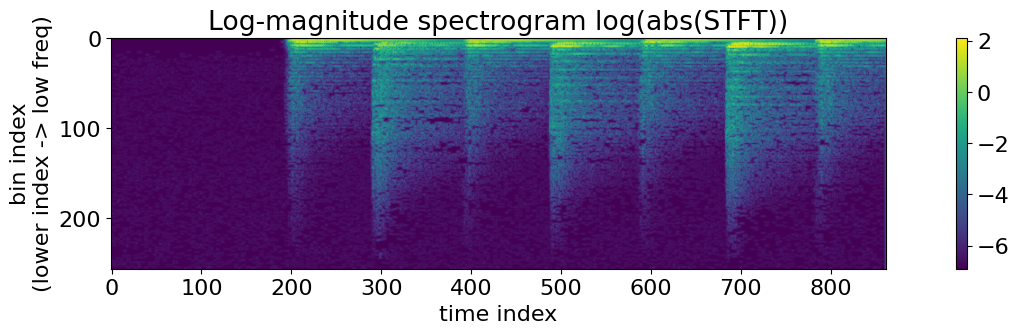

In [18]:
plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(lower index -> low freq)'); plt.xlabel('time index')
plt.title('Log-magnitude spectrogram log(abs(STFT))');plt.grid(False)

ipd.Audio(src, rate=sr) # Load a numpy array as an audio stream

This is the same as decibel scaling

Do the same but flip the figure so that the lowest frequencies are on the bottom of the figure

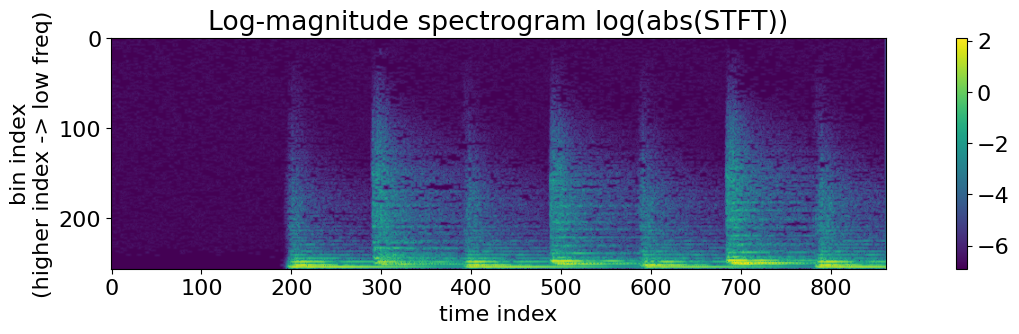

In [19]:
log_stft = np.log(np.abs(stft_complex) + eps)
log_stft = np.flipud(log_stft) # flip the vertical axis

plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(higher index -> low freq)'); plt.xlabel('time index')
plt.title('Log-magnitude spectrogram log(abs(STFT))');plt.grid(False)

ipd.Audio(src, rate=sr) # Load a numpy array as an audio stream

# Use libros

In [21]:
# Stft is the short time fourier transform and is therefore complex
# lets use a version that is absolute
stft = np.abs(stft_complex)

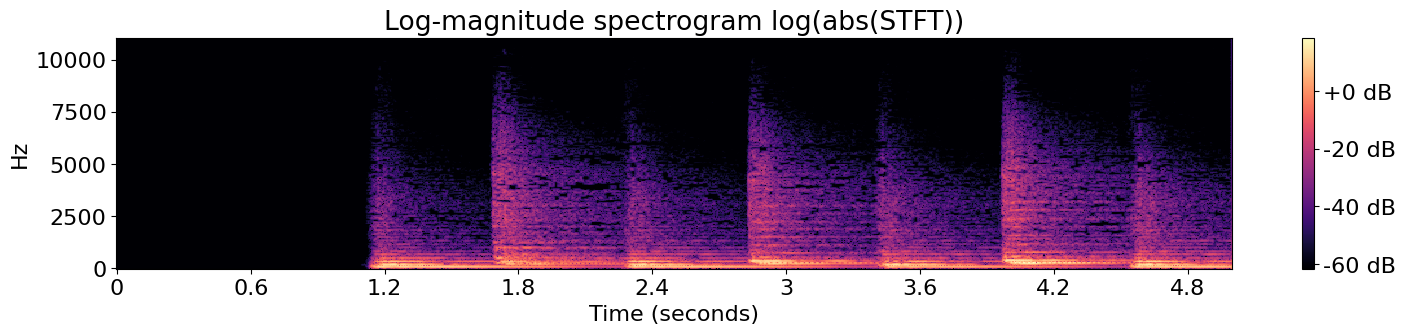

In [22]:
plt.figure(figsize = wide)
img = librosa.display.specshow(librosa.amplitude_to_db(stft), sr=SR, x_axis='s', y_axis='linear', hop_length=hop_length)
plt.colorbar(img, format = "%+2.f dB")
plt.title('Log-magnitude spectrogram log(abs(STFT))');plt.grid(False)

# Mel Spectrogram

The mel spectrogram cuts the frequency range down to more closely reflect human hearing. 

This also improves the application of deep learning as band frequency decreases 

In [27]:
log_mel = librosa.power_to_db(
    np.abs(
        librosa.feature.melspectrogram(y=src, sr=SR, n_fft=n_fft, hop_length=hop_length, power=2.0, n_mels=128)
    )
)

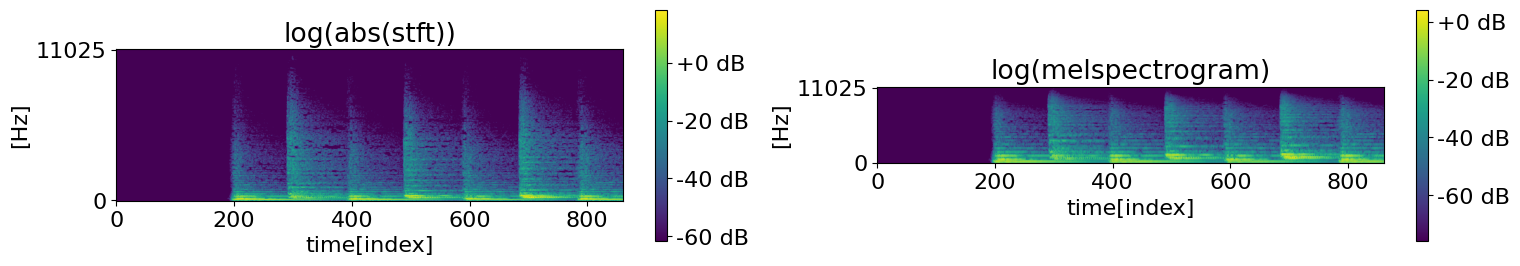

In [30]:
plt.figure(figsize=(wide))
plt.subplot(1, 2, 1)
img = plt.imshow(np.flipud(librosa.amplitude_to_db(stft)))
plt.colorbar(img, format="%+2.f dB")
plt.title('log(abs(stft))'); plt.grid(False);
plt.yticks([0, n_fft//2], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time[index]')
plt.subplot(1, 2, 2)
img = plt.imshow(np.flipud(log_mel))
plt.colorbar(img, format="%+2.f dB")
plt.title('log(melspectrogram)'); plt.grid(False);plt.yticks([]); plt.yticks([0, 128], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time[index]');

# Constant-Q Transform

Uses time-varying windows for different centre frequency 

In [31]:
log_cqt = librosa.amplitude_to_db(
    np.abs(
librosa.cqt(src, sr=SR, hop_length=hop_length, n_bins=24*7, bins_per_octave=24, fmin=librosa.note_to_hz('C1'))
) )

Text(0.5, 1.0, 'log(cqt)')

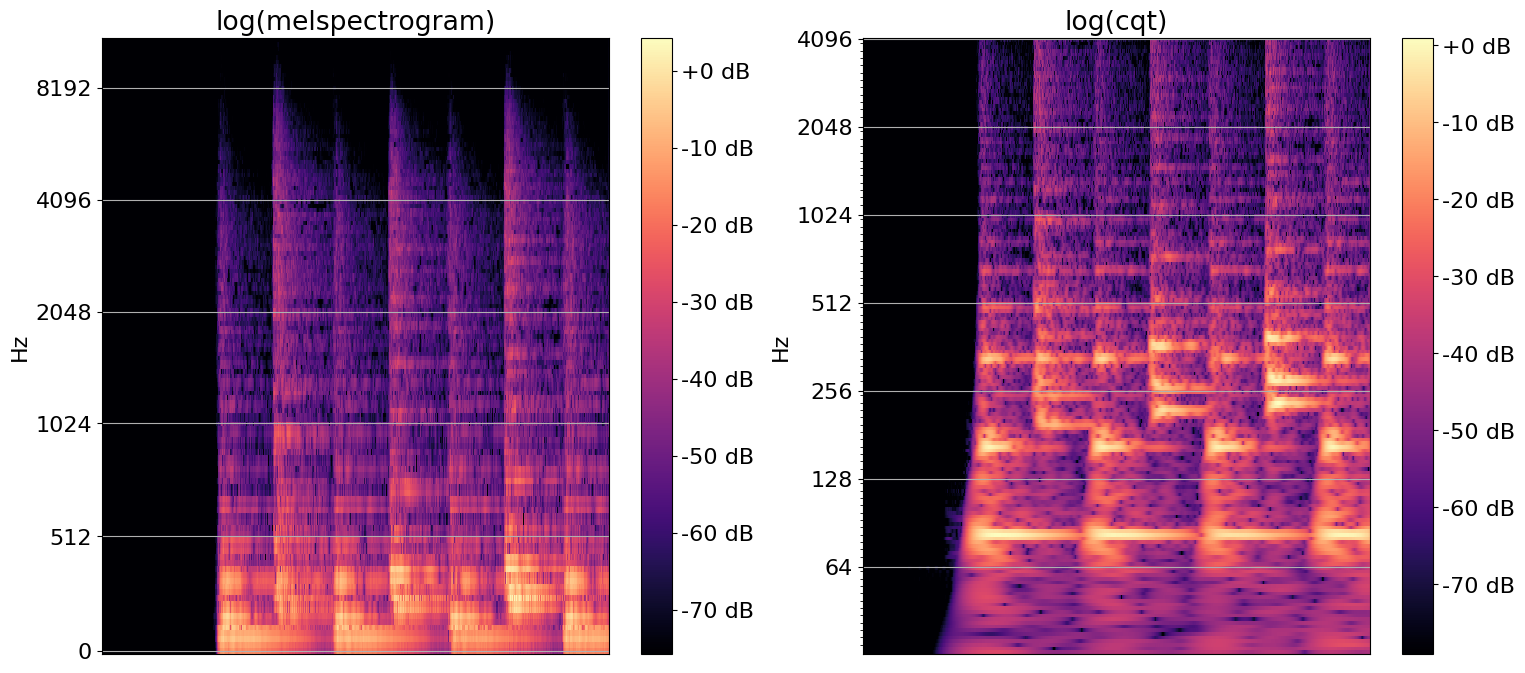

In [32]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
img = librosa.display.specshow(log_mel, y_axis='mel', sr=SR, hop_length=hop_length)
plt.colorbar(img, format="%+2.f dB") 
plt.title('log(melspectrogram)')
plt.subplot(1, 2, 2)
img = librosa.display.specshow(log_cqt, y_axis='cqt_hz', sr=SR, hop_length=hop_length, bins_per_octave=24) 
plt.colorbar(img, format="%+2.f dB") 
plt.title('log(cqt)')

We get a better resolution on the pitches that 'matter'.